우도 지역의 강수량을 예측한다.

In [1]:
import pandas as pd
import numpy as np

rain_train = pd.read_csv('data/rain/train.csv')
rain_test = pd.read_csv('data/rain/test.csv')
rain_submission = pd.read_csv('data/rain/submission.csv')

In [2]:
rain_submission

,No,rain fall(mm)
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
869,870,0
870,871,0
871,872,0
872,873,0


In [3]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
rain_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   지점                   3504 non-null   int64  
 1   일시                   3504 non-null   object 
 2   평균기온(°C)             3488 non-null   float64
 3   최저기온(°C)             3493 non-null   float64
 4   최저기온 시각(hhmi)        3493 non-null   float64
 5   최고기온(°C)             3493 non-null   float64
 6   최고기온 시각(hhmi)        3493 non-null   float64
 7   일강수량(mm)             3500 non-null   float64
 8   최대 순간 풍속(m/s)        3471 non-null   float64
 9   평균 풍속(m/s)           3468 non-null   float64
 10  최대 순간 풍속 풍향(deg)     2021 non-null   float64
 11  최대 순간풍속 시각(hhmi)     2882 non-null   float64
 12  1시간 최다강수량(mm)        1726 non-null   float64
 13  1시간 최다 강수량 시각(hhmi)  567 non-null    float64
 14  최대 순간 풍속 풍향(hhmi)    1451 non-null   float64
dtypes: float64(13), int64(1), object(1)
me

In [5]:
rain_train.isnull().sum()

지점                        0
일시                        0
평균기온(°C)                 16
최저기온(°C)                 11
최저기온 시각(hhmi)            11
최고기온(°C)                 11
최고기온 시각(hhmi)            11
일강수량(mm)                  4
최대 순간 풍속(m/s)            33
평균 풍속(m/s)               36
최대 순간 풍속 풍향(deg)       1483
최대 순간풍속 시각(hhmi)        622
1시간 최다강수량(mm)          1778
1시간 최다 강수량 시각(hhmi)    2937
최대 순간 풍속 풍향(hhmi)      2053
dtype: int64

In [4]:
rain_train['평균기온(°C)'] = rain_train['평균기온(°C)'].fillna(rain_train[rain_train['평균기온(°C)'].notnull()]['평균기온(°C)'].mean()) # 평균으로 null을 교체
rain_train['최저기온(°C)'] = rain_train['최저기온(°C)'].fillna(rain_train[rain_train['최저기온(°C)'].notnull()]['최저기온(°C)'].mean()) # 평균으로 null을 교체
rain_train['최저기온 시각(hhmi)'] = rain_train['최저기온 시각(hhmi)'].fillna(rain_train[rain_train['최저기온 시각(hhmi)'].notnull()]['최저기온 시각(hhmi)'].mean()) # 평균으로 null을 교체
rain_train['최고기온(°C)'] = rain_train['최고기온(°C)'].fillna(rain_train[rain_train['최고기온(°C)'].notnull()]['최고기온(°C)'].mean()) # 평균으로 null을 교체
rain_train['최고기온 시각(hhmi)'] = rain_train['최고기온 시각(hhmi)'].fillna(rain_train[rain_train['최고기온 시각(hhmi)'].notnull()]['최고기온 시각(hhmi)'].mean()) # 평균으로 null을 교체
rain_train['일강수량(mm)'] = rain_train['일강수량(mm)'].fillna(0) # 평균으로 null을 교체
rain_train['최대 순간 풍속(m/s)'] = rain_train['최대 순간 풍속(m/s)'].fillna(rain_train[rain_train['최대 순간 풍속(m/s)'].notnull()]['최대 순간 풍속(m/s)'].mean()) # 평균으로 null을 교체
rain_train['평균 풍속(m/s)'] = rain_train['평균 풍속(m/s)'].fillna(rain_train[rain_train['평균 풍속(m/s)'].notnull()]['평균 풍속(m/s)'].mean()) # 평균으로 null을 교체
rain_train['최대 순간 풍속 풍향(deg)'] = rain_train['최대 순간 풍속 풍향(deg)'].fillna(rain_train[rain_train['최대 순간 풍속 풍향(deg)'].notnull()]['최대 순간 풍속 풍향(deg)'].mean()) # 평균으로 null을 교체
rain_train['최대 순간풍속 시각(hhmi)'] = rain_train['최대 순간풍속 시각(hhmi)'].fillna(rain_train[rain_train['최대 순간풍속 시각(hhmi)'].notnull()]['최대 순간풍속 시각(hhmi)'].mean()) # 평균으로 null을 교체
rain_train['1시간 최다강수량(mm)'] = rain_train['1시간 최다강수량(mm)'].fillna(rain_train[rain_train['1시간 최다강수량(mm)'].notnull()]['1시간 최다강수량(mm)'].mean()) # 평균으로 null을 교체
rain_train['1시간 최다 강수량 시각(hhmi)'] = rain_train['1시간 최다 강수량 시각(hhmi)'].fillna(rain_train[rain_train['1시간 최다 강수량 시각(hhmi)'].notnull()]['1시간 최다 강수량 시각(hhmi)'].mean()) # 평균으로 null을 교체
rain_train['최대 순간 풍속 풍향(hhmi)'] = rain_train['최대 순간 풍속 풍향(hhmi)'].fillna(rain_train[rain_train['최대 순간 풍속 풍향(hhmi)'].notnull()]['최대 순간 풍속 풍향(hhmi)'].mean()) # 평균으로 null을 교체

In [5]:
rain_test['평균기온(°C)'] = rain_test['평균기온(°C)'].fillna(rain_test[rain_test['평균기온(°C)'].notnull()]['평균기온(°C)'].mean()) # 평균으로 null을 교체
rain_test['최저기온(°C)'] = rain_test['최저기온(°C)'].fillna(rain_test[rain_test['최저기온(°C)'].notnull()]['최저기온(°C)'].mean()) # 평균으로 null을 교체
rain_test['최저기온 시각(hhmi)'] = rain_test['최저기온 시각(hhmi)'].fillna(rain_test[rain_test['최저기온 시각(hhmi)'].notnull()]['최저기온 시각(hhmi)'].mean()) # 평균으로 null을 교체
rain_test['최고기온(°C)'] = rain_test['최고기온(°C)'].fillna(rain_test[rain_test['최고기온(°C)'].notnull()]['최고기온(°C)'].mean()) # 평균으로 null을 교체
rain_test['최고기온 시각(hhmi)'] = rain_test['최고기온 시각(hhmi)'].fillna(rain_test[rain_test['최고기온 시각(hhmi)'].notnull()]['최고기온 시각(hhmi)'].mean()) # 평균으로 null을 교체
rain_test['최대 순간 풍속(m/s)'] = rain_test['최대 순간 풍속(m/s)'].fillna(rain_test[rain_test['최대 순간 풍속(m/s)'].notnull()]['최대 순간 풍속(m/s)'].mean()) # 평균으로 null을 교체
rain_test['평균 풍속(m/s)'] = rain_test['평균 풍속(m/s)'].fillna(rain_test[rain_test['평균 풍속(m/s)'].notnull()]['평균 풍속(m/s)'].mean()) # 평균으로 null을 교체
rain_test['최대 순간 풍속 풍향(deg)'] = rain_test['최대 순간 풍속 풍향(deg)'].fillna(rain_test[rain_test['최대 순간 풍속 풍향(deg)'].notnull()]['최대 순간 풍속 풍향(deg)'].mean()) # 평균으로 null을 교체
rain_test['최대 순간풍속 시각(hhmi)'] = rain_test['최대 순간풍속 시각(hhmi)'].fillna(rain_test[rain_test['최대 순간풍속 시각(hhmi)'].notnull()]['최대 순간풍속 시각(hhmi)'].mean()) # 평균으로 null을 교체
rain_test['1시간 최다강수량(mm)'] = rain_test['1시간 최다강수량(mm)'].fillna(rain_test[rain_test['1시간 최다강수량(mm)'].notnull()]['1시간 최다강수량(mm)'].mean()) # 평균으로 null을 교체
rain_test['1시간 최다 강수량 시각(hhmi)'] = rain_test['1시간 최다 강수량 시각(hhmi)'].fillna(rain_test[rain_test['1시간 최다 강수량 시각(hhmi)'].notnull()]['1시간 최다 강수량 시각(hhmi)'].mean()) # 평균으로 null을 교체
rain_test['최대 순간 풍속 풍향(hhmi)'] = rain_test['최대 순간 풍속 풍향(hhmi)'].fillna(rain_test[rain_test['최대 순간 풍속 풍향(hhmi)'].notnull()]['최대 순간 풍속 풍향(hhmi)'].mean()) # 평균으로 null을 교체

In [21]:
rain_train

,지점,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(deg),최대 순간풍속 시각(hhmi),1시간 최다강수량(mm),1시간 최다 강수량 시각(hhmi),최대 순간 풍속 풍향(hhmi)
0,725,16.6,14.7,439.0,18.5,1231.0,0.0,4.8,2.6,3.6,1158.0,0.0,0.0,0.0
1,725,19.3,17.9,739.0,22.6,1505.0,13.5,4.9,1.9,97.1,341.0,0.0,0.0,0.0
2,725,13.4,8.6,48.0,17.4,1142.0,0.0,5.1,1.8,191.1,334.0,0.0,0.0,0.0
3,725,18.3,15.6,509.0,21.8,1044.0,0.0,6.0,2.7,0.0,1739.0,0.0,0.0,176.6
4,725,10.5,9.1,649.0,12.7,1429.0,0.0,8.6,5.3,312.7,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,725,9.4,7.8,1138.0,10.4,2321.0,5.0,18.3,7.6,297.8,32.0,0.0,0.0,0.0
3500,725,13.7,10.7,236.0,18.2,1331.0,0.0,7.7,1.9,0.0,10.0,0.0,0.0,305.8
3501,725,17.5,15.0,33.0,19.9,1539.0,0.0,8.6,2.5,0.0,1240.0,0.0,0.0,91.6
3502,725,6.1,4.5,318.0,8.5,1413.0,0.0,8.6,4.1,325.9,1.0,0.0,0.0,0.0


In [20]:
rain_test

,지점,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(deg),최대 순간풍속 시각(hhmi),1시간 최다강수량(mm),1시간 최다 강수량 시각(hhmi),최대 순간 풍속 풍향(hhmi)
0,725,8.9,6.4,2352.0,10.7,1020.0,13.3,6.1,0.0,152.0,0.5,1300.0,68.3
1,725,8.4,7.4,2010.0,10.3,159.0,18.2,6.2,0.0,1922.0,4.0,1400.0,52.0
2,725,7.7,3.6,643.0,12.4,1345.0,9.2,2.6,244.5,0.0,0.0,0.0,0.0
3,725,23.5,21.8,657.0,25.9,1434.0,9.3,3.9,0.0,1021.0,0.0,0.0,343.9
4,725,20.0,17.9,1314.0,21.7,739.0,16.8,5.5,0.0,929.0,13.5,1300.0,166.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,725,6.9,5.6,2058.0,9.4,1.0,13.9,7.5,323.4,0.0,0.0,0.0,0.0
870,725,0.0,24.6,2005.0,27.4,1.0,32.4,15.5,14.9,2009.0,0.0,0.0,0.0
871,725,19.7,18.0,2141.0,22.0,1456.0,12.6,6.6,0.0,1735.0,0.0,0.0,344.9
872,725,18.4,17.0,2337.0,19.7,1257.0,11.2,4.7,0.0,2139.0,0.5,500.0,341.5


In [80]:
rain_test.isnull().sum()

지점                     0
일시                     0
평균기온(°C)               0
최저기온(°C)               0
최저기온 시각(hhmi)          0
최고기온(°C)               0
최고기온 시각(hhmi)          0
최대 순간 풍속(m/s)          0
평균 풍속(m/s)             0
최대 순간 풍속 풍향(deg)       0
최대 순간풍속 시각(hhmi)       0
1시간 최다강수량(mm)          0
1시간 최다 강수량 시각(hhmi)    0
최대 순간 풍속 풍향(hhmi)      0
dtype: int64

In [6]:
rain_train["일시"] = pd.to_datetime(rain_train["일시"])
rain_train["일시"] = rain_train["일시"].values.astype(float) # array를 반환하는건가?
rain_test["일시"] = pd.to_datetime(rain_test["일시"])
rain_test["일시"] = rain_test["일시"].values.astype(float)

In [10]:
y

array([ 0. , 13.5,  0. , ...,  0. ,  0. ,  5.5])

In [8]:
len(X_train_scaled), len(y_train)

(3153, 3153)

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = rain_train.drop(columns="일강수량(mm)")
y = rain_train["일강수량(mm)"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)
scaler = StandardScaler()

kf = KFold(n_splits=10, shuffle=True, random_state=10)
n_alpha = np.array([])
r2_scores = np.array([])
i = 1

while i < 101:
    n_alpha = np.append(n_alpha, i)
    i += 1
    
for alpha in n_alpha:
    model_ElasticNet = LogisticRegression()
    for train_idx, test_idx in kf.split(X):
        X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model_ElasticNet.fit(X_train_scaled, y_train)
        y_pred = model_ElasticNet.predict(X_test_scaled)
        r2 = accuracy_score(y_test, y_pred)
    #     if r2 == 0.6335033019736432:
    #         break
    # if r2 == 0.6335033019736432:  # 이중으로 break 해야 끝나는 것을 놓치고 있었다.
    #         break
        r2_scores = np.append(r2_scores, r2)
best_cval = max(r2_scores)

KeyError: "None of [Int64Index([   0,    2,    3,    4,    5,    6,    7,    8,    9,   10,\n            ...\n            3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503],\n           dtype='int64', length=3153)] are in the [columns]"

In [34]:
r2

0.011004467187788247

In [16]:
best_cval

0.6317893312818061

In [43]:
answer = pd.read_csv('data/rain/submission.csv')
y_pred = model_ElasticNet.predict(rain_test)
answer["rain fall(mm)"] = y_pred
answer

c:\Users\PlayData\anaconda3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


,No,rain fall(mm)
0,1,3.126485
1,2,16.998885
2,3,1.980284
3,4,1.022536
4,5,39.231857
...,...,...
869,870,5.533332
870,871,22.274770
871,872,2.200636
872,873,3.856026


In [46]:
answer.to_csv("rain_project_answer.csv", index=False)

In [ ]:
# rain_train[rain_train["최대 순간 풍속 풍향(hhmi)"].isnull()]

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix())

In [71]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/Users/PlayData/AppData/Local/Microsoft/Windows/Fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'NanumGothic'
print(mpl.rcParams['font.family'])
mpl.rcParams['axes.unicode_minus'] = False

????
Dokdo
EF_????
Dongle
NanumGothic
['NanumGothic']


<AxesSubplot: >

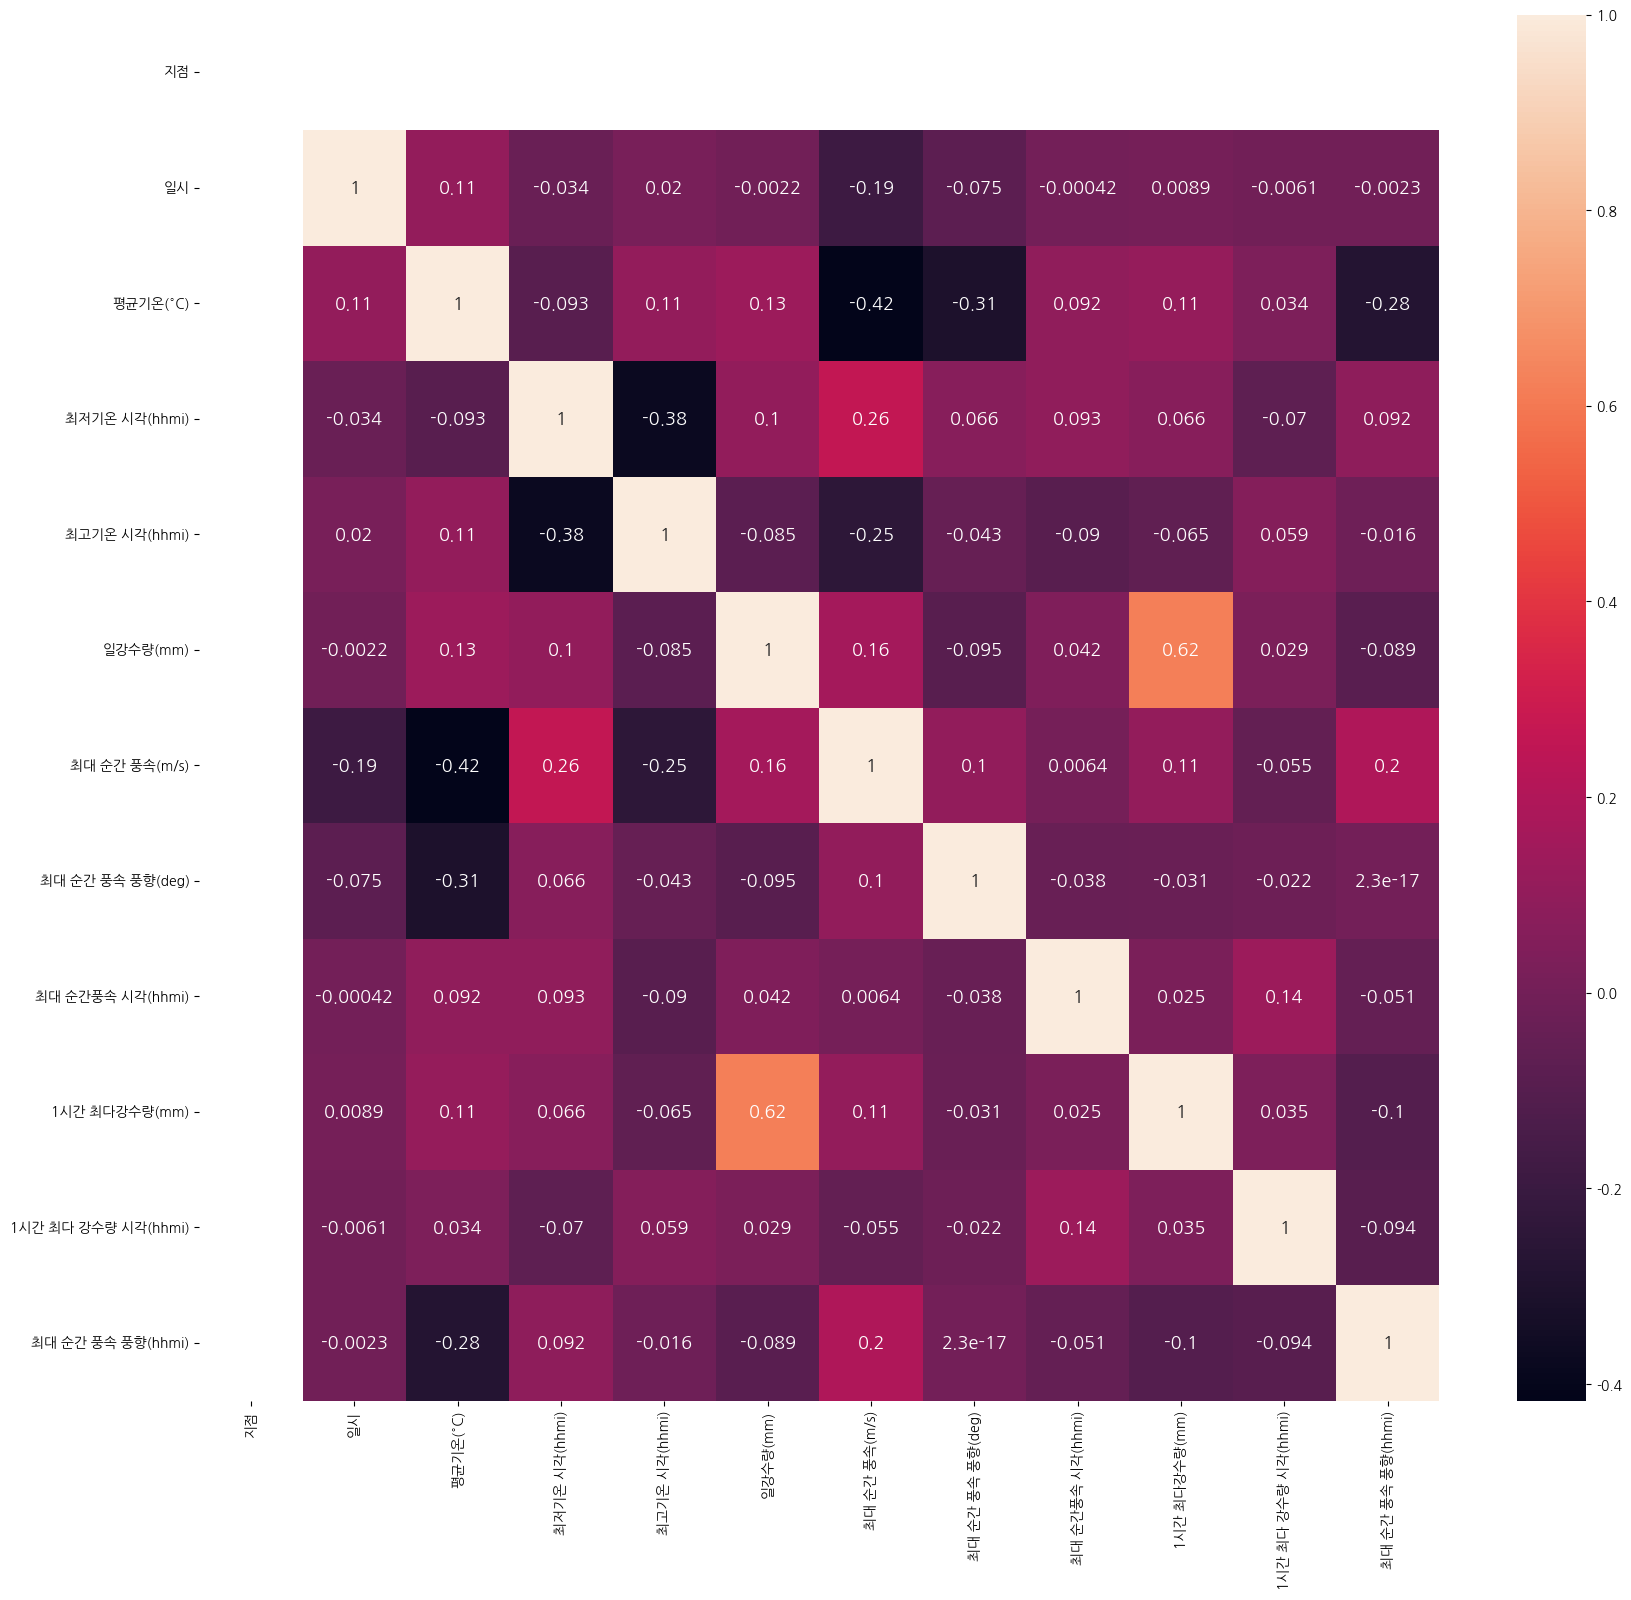

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

corrs = rain_train[rain_train.columns].corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corrs, annot=True, annot_kws={'size':13})


In [67]:
rain_train.columns

Index(['지점', '일시', '평균기온(°C)', '최저기온 시각(hhmi)', '최고기온 시각(hhmi)', '일강수량(mm)',
       '최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(deg)', '최대 순간풍속 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '최대 순간 풍속 풍향(hhmi)'],
      dtype='object')

In [66]:
del rain_train["평균 풍속(m/s)"]


# rain_train["최고기온(°C)"] rain_train["평균 풍속(m/s)"]

In [79]:
# rain_train["일시"] = pd.to_datetime(rain_train["일시"])
# rain_train["일시"] = rain_train["일시"].values.astype(float) # array를 반환하는건가?
# rain_test["일시"] = pd.to_datetime(rain_test["일시"])
# rain_test["일시"] = rain_test["일시"].values.astype(float)

In [91]:
# rain_train_date_valuecounts = rain_train["일시"].value_counts()

In [99]:
# rain_train["일시"].dt.month  == 3

0       False
1       False
2       False
3       False
4       False
        ...  
3499     True
3500     True
3501    False
3502     True
3503    False
Name: 일시, Length: 3504, dtype: bool

In [104]:
# rain_train["일시"] = pd.to_datetime(rain_train["일시"])

# rain_test["일시"] = pd.to_datetime(rain_test["일시"])

# rain_train["일시"][rain_train["일시"].dt.month == 3] = 0
#     rain_train["일시"] = rain_train["일시"].values.astype(float)
#     rain_train["일시"] = 0 # spring
# elif (rain_train["일시"].dt.month == 4):
#     rain_train["일시"] = 0 # spring
# elif (rain_train["일시"].dt.month == 5):
#     rain_train["일시"] = 0 # spring
# elif rain_train["일시"].dt.month == 6:
#     rain_train["일시"] = 1 # summer
# elif rain_train["일시"].dt.month == 7:
#     rain_train["일시"] = 1 # summer
# elif rain_train["일시"].dt.month == 8:
#     rain_train["일시"] = 1 # summer
# elif rain_train["일시"].dt.month == 9:
#     rain_train["일시"] = 1 # summer
# elif rain_train["일시"].dt.month == 10:
#     rain_train["일시"] = 1 # summer
# elif rain_train["일시"].dt.month == 11:
#     rain_train["일시"] = 2 # winter
# elif rain_train["일시"].dt.month == 12:
#     rain_train["일시"] = 2 # winter
# elif rain_train["일시"].dt.month == 1:
#     rain_train["일시"] = 2 # winter
# elif rain_train["일시"].dt.month == 2:
#     rain_train["일시"] = 2 # winter

# if (rain_test["일시"].dt.month == 3):
#     rain_test["일시"] = rain_test["일시"].values.astype(float)
#     rain_test["일시"] = 0 # spring
# elif (rain_test["일시"].dt.month == 4):
#     rain_test["일시"] = 0 # spring
# elif (rain_test["일시"].dt.month == 5):
#     rain_test["일시"] = 0 # spring
# elif rain_test["일시"].dt.month == 6:
#     rain_test["일시"] = 1 # summer
# elif rain_test["일시"].dt.month == 7:
#     rain_test["일시"] = 1 # summer
# elif rain_test["일시"].dt.month == 8:
#     rain_test["일시"] = 1 # summer
# elif rain_test["일시"].dt.month == 9:
#     rain_test["일시"] = 1 # summer
# elif rain_test["일시"].dt.month == 10:
#     rain_test["일시"] = 1 # summer
# elif rain_test["일시"].dt.month == 11:
#     rain_test["일시"] = 2 # winter
# elif rain_test["일시"].dt.month == 12:
#     rain_test["일시"] = 2 # winter
# elif rain_test["일시"].dt.month == 1:
#     rain_test["일시"] = 2 # winter
# elif rain_test["일시"].dt.month == 2:
#     rain_test["일시"] = 2 # winter

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [16]:
# rain_train["일시"] = pd.to_datetime(rain_train["일시"])

# rain_test["일시"] = pd.to_datetime(rain_test["일시"])

In [18]:
# rain_train["일시"][rain_train["일시"].dt.month == 6] = 1
# rain_train["일시"]

C:\Users\PlayData\AppData\Local\Temp\ipykernel_11732\240802830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_train["일시"][rain_train["일시"].dt.month == 6] = 1


0       2018-11-03 00:00:00
1       2018-05-29 00:00:00
2       2019-12-10 00:00:00
3                         1
4       2017-04-01 00:00:00
               ...         
3499    2020-03-28 00:00:00
3500    2014-03-31 00:00:00
3501    2014-11-23 00:00:00
3502    2018-03-09 00:00:00
3503    2013-09-07 00:00:00
Name: 일시, Length: 3504, dtype: object

In [8]:
# rain_train["일시"][rain_train["일시"].dt.month == 3] = 3
# rain_train["일시"][rain_train["일시"].dt.month == 4] = 0
# rain_train["일시"][rain_train["일시"].dt.month == 5] = 0
# rain_train["일시"][rain_train["일시"].dt.month == 6] = 1
# rain_train["일시"][rain_train["일시"].dt.month == 7] = 1
# rain_train["일시"][rain_train["일시"].dt.month == 8] = 1
# rain_train["일시"][rain_train["일시"].dt.month == 9] = 1
# rain_train["일시"][rain_train["일시"].dt.month == 10] = 2
# rain_train["일시"][rain_train["일시"].dt.month == 11] = 3
# rain_train["일시"][rain_train["일시"].dt.month == 12] = 3
# rain_train["일시"][rain_train["일시"].dt.month == 1] = 3
# rain_train["일시"][rain_train["일시"].dt.month == 2] = 3

TypeError: cannot convert an object of type <class 'pandas.core.series.Series'> to a datetimelike index

In [ ]:
# rain_test["일시"][rain_test["일시"].dt.month == 3] = 3
# rain_test["일시"][rain_test["일시"].dt.month == 4] = 0
# rain_test["일시"][rain_test["일시"].dt.month == 5] = 0
# rain_test["일시"][rain_test["일시"].dt.month == 6] = 1
# rain_test["일시"][rain_test["일시"].dt.month == 7] = 1
# rain_test["일시"][rain_test["일시"].dt.month == 8] = 1
# rain_test["일시"][rain_test["일시"].dt.month == 9] = 1
# rain_test["일시"][rain_test["일시"].dt.month == 10] = 2
# rain_test["일시"][rain_test["일시"].dt.month == 11] = 3
# rain_test["일시"][rain_test["일시"].dt.month == 12] = 3
# rain_test["일시"][rain_test["일시"].dt.month == 1] = 3
# rain_test["일시"][rain_test["일시"].dt.month == 2] = 3

In [88]:
# pd.get_dummies(rain_train["일시"])

,2010-01-02,2010-01-03,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-09,2010-01-10,2010-01-11,...,2021-12-21,2021-12-22,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# onehot_train = pd.get_dummies(rain_train["일시"])

# onehot_test = pd.get_dummies(rain_test["일시"])

# del rain_train["일시"]
# del rain_test["일시"]

# rain_train = pd.concat([rain_train, onehot_train], axis=1)
# rain_test = pd.concat([rain_test, onehot_test], axis=1)

In [23]:
best_cval

0.6259036920285412